In [3]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# membaca dan memindahkan data dari JSON ke dalam dataframe
df = pd.read_json("C:/Users/ASUS/Documents/0. kuliah/aslab/basdat/s1/Seleksi-2023-Tugas-1/Data Scraping/data/scraping_webometrics.json")
df

,Ranking,World Ranking,University,Country,Impact Rank,Openness Rank,Excellence Rank,Uni Profile
0,1,47,National University of Singapore,Singapore,119,60,22,https://ror.org/01tgyzw49
1,2,87,Nanyang Technological University,Singapore,304,95,36,https://ror.org/02e7b5302
2,3,291,University of Malaya,Malaysia,440,373,244,https://ror.org/00rzspn62
3,4,447,Chulalongkorn University,Thailand,559,584,526,https://ror.org/028wp3y58
4,5,450,Universiti Teknologi Malaysia,Malaysia,979,413,362,https://ror.org/026w31v75
...,...,...,...,...,...,...,...,...
4593,4596,32164,STMIK Citra Mandiri Padangsidimpuan,Indonesia,32164,6553,7212,https://en.wikipedia.org/wiki/STMIK Citra Mand...
4594,4597,32164,STAI Hidayatut Thullab,Indonesia,32164,6553,7212,https://en.wikipedia.org/wiki/STAI Hidayatut T...
4595,4598,32164,Sekolah Tinggi Agama Islam STAI Ma'arif,Indonesia,32164,6553,7212,https://en.wikipedia.org/wiki/Sekolah Tinggi A...
4596,4599,32164,STAI Ma'arif Sarolangun,Indonesia,32164,6553,7212,https://en.wikipedia.org/wiki/STAI Ma'arif Sar...


In [5]:
# mengelompokkan universitas berdasarkan asal negaranya
univ_country = pd.DataFrame(df["Country"].value_counts())
univ_country

,count
Country,
Indonesia,3286
Malaysia,367
Philipine,365
Thailand,193
Vietnam,184
Myanmar,88
Kamboja,51
Singapore,45
Timor Leste,8


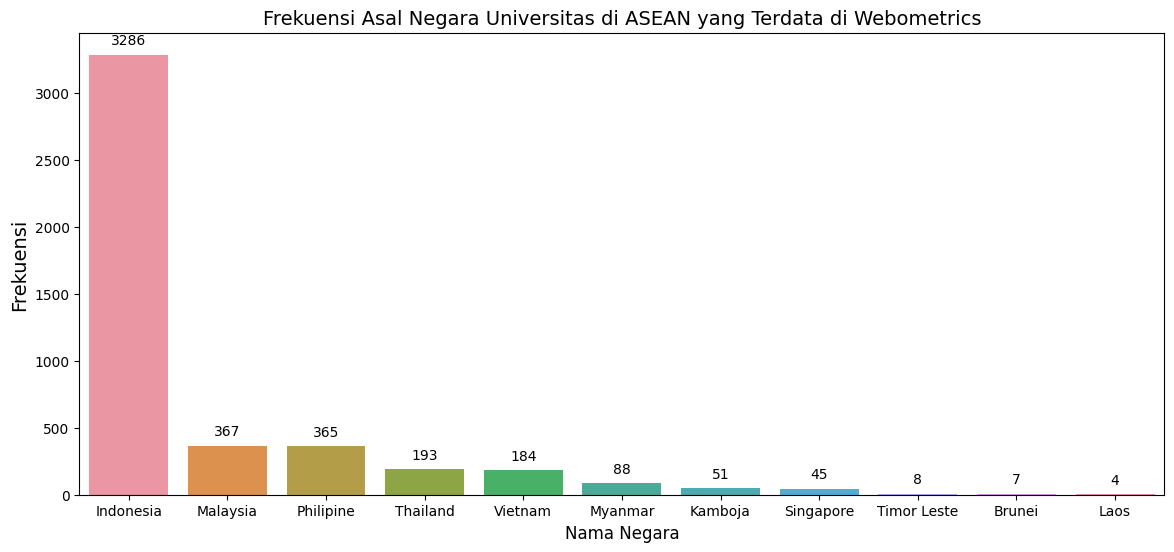

In [8]:
# melakukan visualisasi terhadap frekuensi universitas di tiap negara ASEAN yang tercatat pada webometrics

plt.figure(figsize=(14, 6))

plt.title("Frekuensi Asal Negara Universitas di ASEAN yang Terdata di Webometrics", loc="center", fontsize=14)

sns.barplot(x=univ_country.index, y=univ_country["count"])
plt.xlabel("Nama Negara", fontsize=12)
plt.ylabel("Frekuensi", fontsize=14)

# memberikan keterangan jumlah pasti dari frekuensi
for index, value in enumerate(univ_country["count"]):
    plt.annotate(str(value), xy=(index, value), xytext=(0, 5), textcoords="offset points", ha="center", va="bottom", fontsize=10)

plt.savefig("Visualisasi Frekuensi Asal Negara.png",dpi=300)
plt.show()

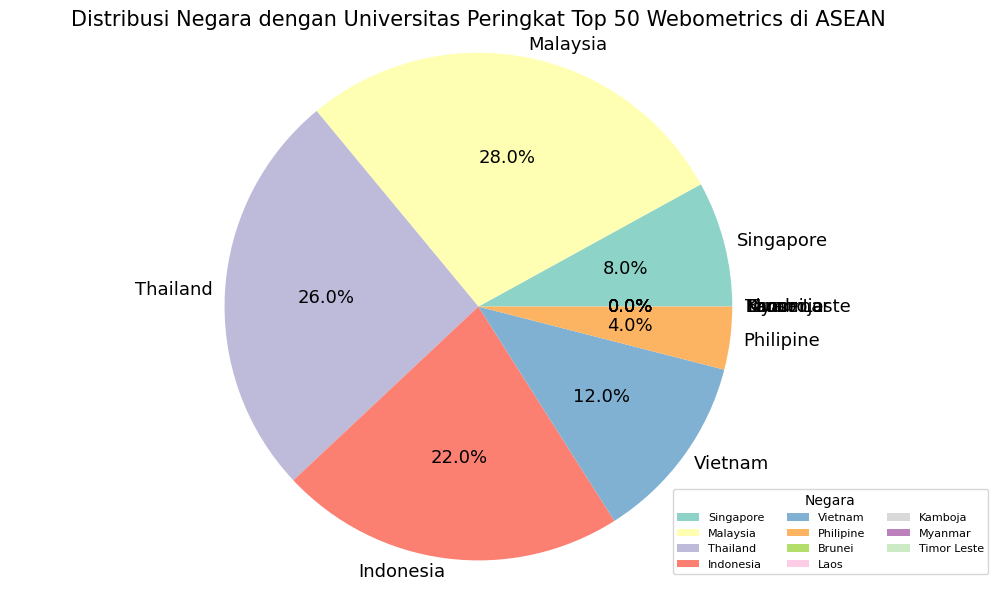

In [9]:
# melakukan visualisasi terkait distribusi asal negara dari Top 50 universitas ASEAN versi Webometrics

top50 = df[df["Ranking"] <= 50]

dist = top50["Country"].value_counts()
co = df['Country'].unique()
dist = dist.reindex(co, fill_value=0)
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(dist, labels=dist.index, autopct="%1.1f%%", colors=sns.color_palette("Set3", 11), textprops={'fontsize':13}, labeldistance=1.05)
ax1.set_title("Distribusi Negara dengan Universitas Peringkat Top 50 Webometrics di ASEAN", loc="center", fontsize=15)
ax1.axis("equal")
leg = ax1.legend(dist.index, title="Negara", loc="lower right", bbox_to_anchor=(1.05, 0), ncol=3, fontsize=8)

plt.tight_layout()
plt.savefig("Visualisasi Country of Top 50.png", dpi =300)
plt.show()

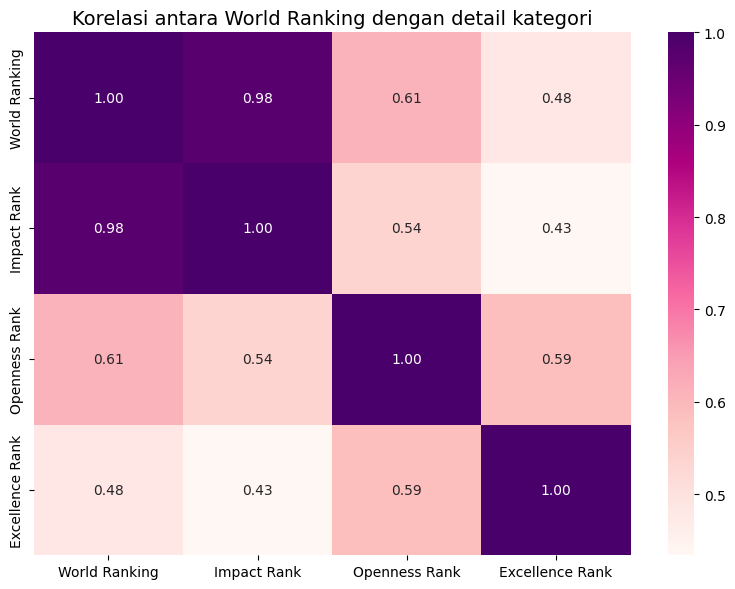

'Impact Rank'

In [10]:
# melakukan visualisasi terkait korelasi antara World Ranking dengan detail kategori (Impact Ranking, Excellence Ranking, Openness Ranking)
correlation = df[['World Ranking', 'Impact Rank', 'Openness Rank', 'Excellence Rank']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='RdPu', fmt=".2f")
plt.title("Korelasi antara World Ranking dengan detail kategori", loc="center", fontsize=14)
plt.tight_layout()

plt.savefig("Visualisasi Kor Aspek dengan World Rank.png", dpi=300)
plt.show()

# untuk mengetahui kategori yang paling signifikan terhadap world ranking berdasarkan hasil korelasi
correlation.loc['World Ranking', ['Impact Rank', 'Openness Rank', 'Excellence Rank']].abs().idxmax()

In [11]:
df_sort = df.sort_values(by=["Country", "World Ranking"])
df_highest_rank = df_sort.drop_duplicates(subset="Country", keep="first")

df_highest_rank

,Ranking,World Ranking,University,Country,Impact Rank,Openness Rank,Excellence Rank,Uni Profile
94,95,2610,University of Brunei Darussalam,Brunei,3036,6553,1742,https://ror.org/02qnf3n86
9,10,583,Universitas Indonesia,Indonesia,299,686,1126,https://ror.org/0116zj450
189,190,4833,Royal University of Phnom Penh,Kamboja,8094,5710,4929,https://ror.org/05rtvan68
186,187,4744,National University of Laos,Laos,9695,4425,4893,https://ror.org/031xne895
2,3,291,University of Malaya,Malaysia,440,373,244,https://ror.org/00rzspn62
276,277,5737,University of Yangon,Myanmar,12633,6553,4806,https://ror.org/038724806
20,21,949,(3) University of the Philippines Diliman,Philipine,951,1919,1147,https://ror.org/03tbh6y23
0,1,47,National University of Singapore,Singapore,119,60,22,https://ror.org/01tgyzw49
3,4,447,Chulalongkorn University,Thailand,559,584,526,https://ror.org/028wp3y58
632,633,9424,Universidade Nacional Timor Lorosa'e,Timor Leste,17560,6553,5956,https://ror.org/026hhvp67
